# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [41]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
data = pd.read_csv(r"C:\Users\EMMAN\Downloads\foodhub_order.csv")

In [43]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [44]:
# Write your code here
print("There are", data.shape[0], "rows and", data.shape[1], "columns")

There are 1898 rows and 9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [45]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [46]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [47]:
# Write your code here
print("The average time:",data["food_preparation_time"].mean() , "\n"
      "The maximum time:", data["food_preparation_time"].max(), "\n"
      "The minimum time:", data["food_preparation_time"].min())
data["food_preparation_time"].describe()

The average time: 27.371970495258168 
The maximum time: 35 
The minimum time: 20


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


In [ ]:
Maximum food preparation time is 35 mins
Minimum food preparation time is 20 mins
Average food preparation time is 27.37 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [59]:
# Write the code here
data[data["rating"]=="Not given"]["order_id"].nunique()

736

#### Observations:


There are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Distribution of Cost of order

C:\Users\EMMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


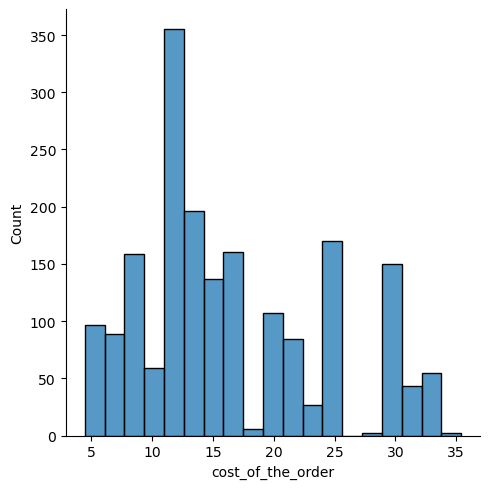

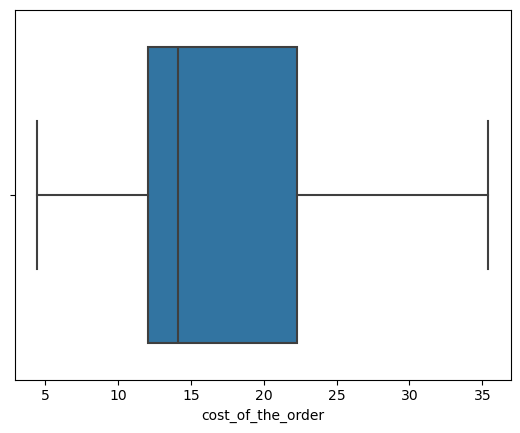

In [90]:
# Write the code here
sns.displot(data = data, x="cost_of_the_order",)
plt.show()
sns.boxplot(data = data, x="cost_of_the_order" )
plt.show()

Distribution of Rating

In [75]:
data["rating"] =data["rating"].replace('Not given',np.nan)

In [82]:
data["rating"] = data["rating"].astype(float)

In [135]:
data["rating"].unique()

array([nan,  5.,  3.,  4.])

C:\Users\EMMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


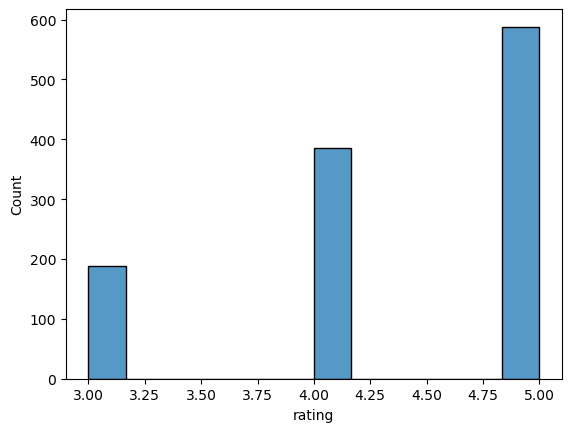

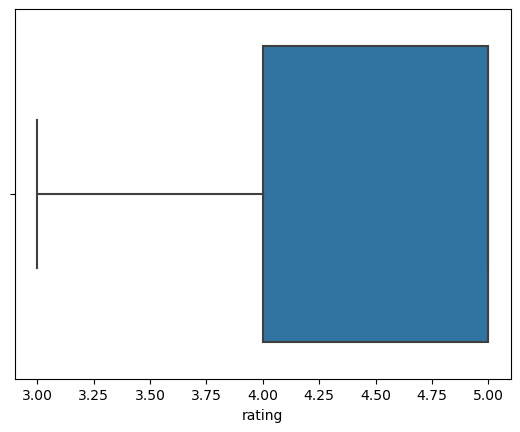

In [98]:
sns.histplot(data = data, x="rating")
plt.show()
sns.boxplot(data = data, x="rating" )
plt.show()

Distribution of Food preparation time

C:\Users\EMMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


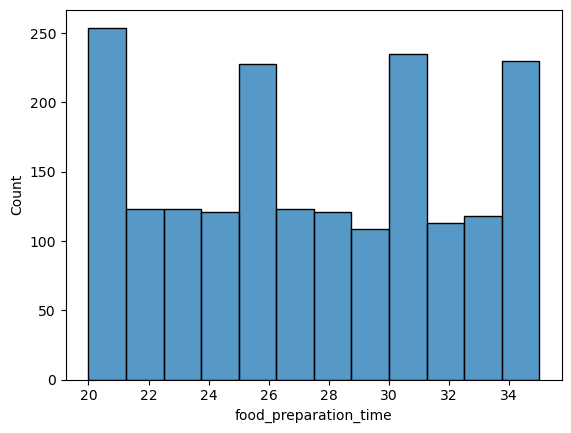

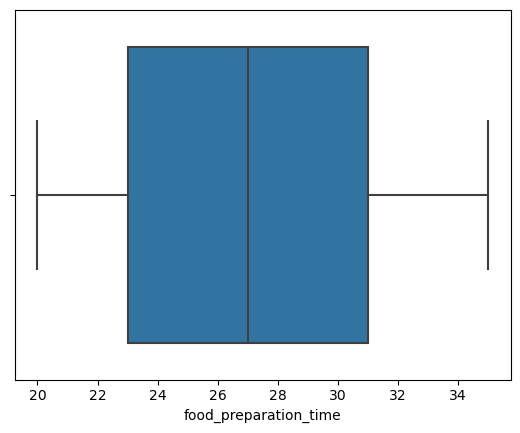

In [96]:
sns.histplot(data = data, x="food_preparation_time")
plt.show()
sns.boxplot(data = data, x="food_preparation_time" )
plt.show()

C:\Users\EMMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


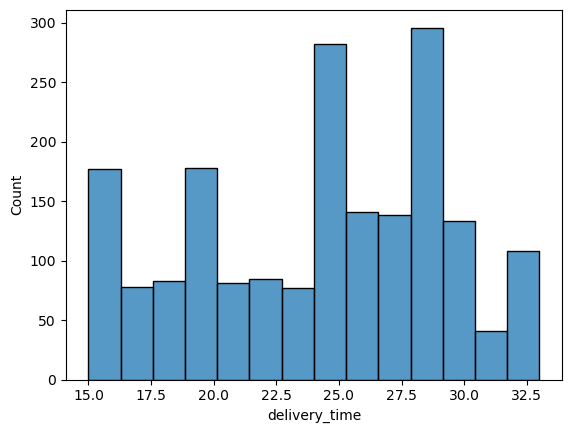

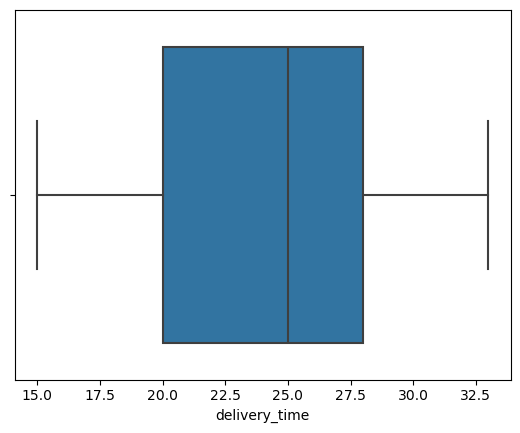

In [95]:
sns.histplot(data = data, x="delivery_time")
plt.show()
sns.boxplot(data = data, x="delivery_time" )
plt.show()

Observations on cuisine type

In [114]:
data["cuisine_type"].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [113]:
data["cuisine_type"].nunique()

14

Observations
There are 14 cuisine types

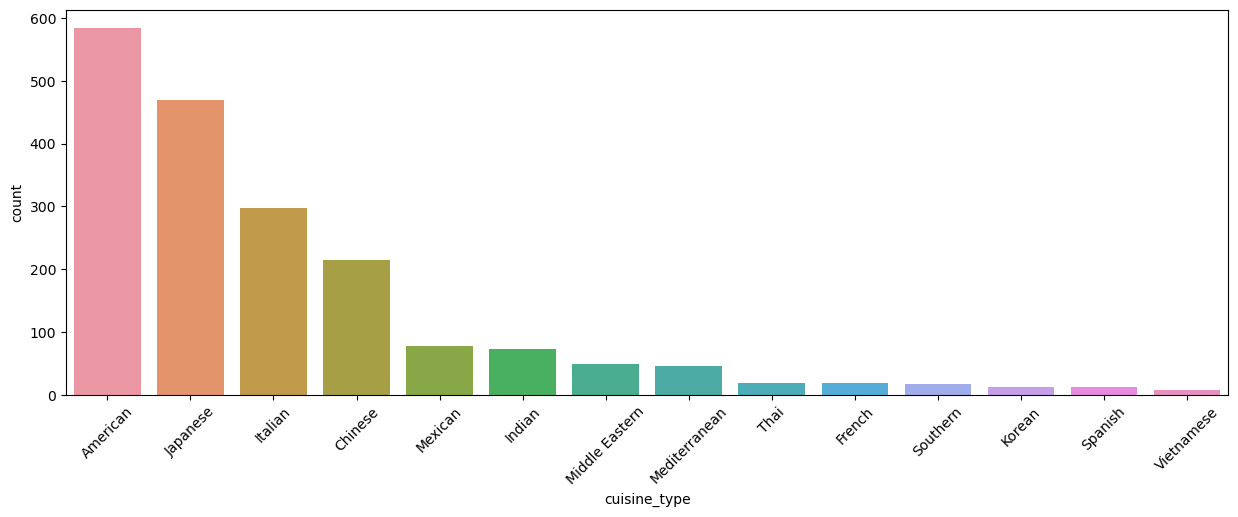

In [369]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x="cuisine_type", order = data["cuisine_type"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

Observations on day of the week

In [127]:
data["day_of_the_week"].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

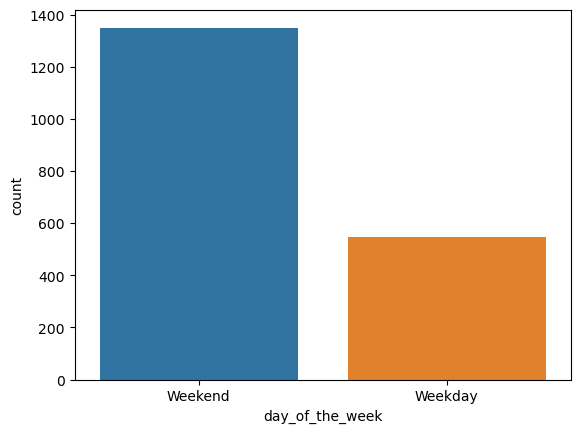

In [128]:
sns.countplot(data = data, x= "day_of_the_week")

Restaurant name

In [140]:
data["restaurant_name"].nunique()

178

In [ ]:
Customers ID

In [142]:
data["customer_id"].nunique()

1200

In [ ]:
Order ID

In [143]:
data["order_id"].nunique()

1898

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [150]:
# Write the code here 
data["restaurant_name"].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [174]:
# Write the code here
is_in_weekend = data[data["day_of_the_week"].isin(["Weekend"])]

is_in_weekend["cuisine_type"].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:


American is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [366]:
# Write the code here
over_20 = data[data["cost_of_the_order"]>20].shape[0]
over_20
Percentage_of_the_orders_that_cost_more_than_20_dollars = (over_20/data.shape[0])*100

#### Observations:


In [216]:
print("percentage of the orders cost more than 20 dollars is",round(Percentage_of_the_orders_that_cost_more_than_20_dollars,1),"%")

percentage of the orders cost more than 20 dollars is 29.2 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [158]:
# Write the code here
data["delivery_time"].mean()

24.161749209694417

#### Observations:


In [218]:
print("The mean order delivery time is", round(data["delivery_time"].mean(),2))

The mean order delivery time is 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [190]:
# Write the code here
data["customer_id"].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


The most frequent customer is with ID 52832: 13 orders
the next is with ID 47440: 10 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cost of order vs cuisine_type

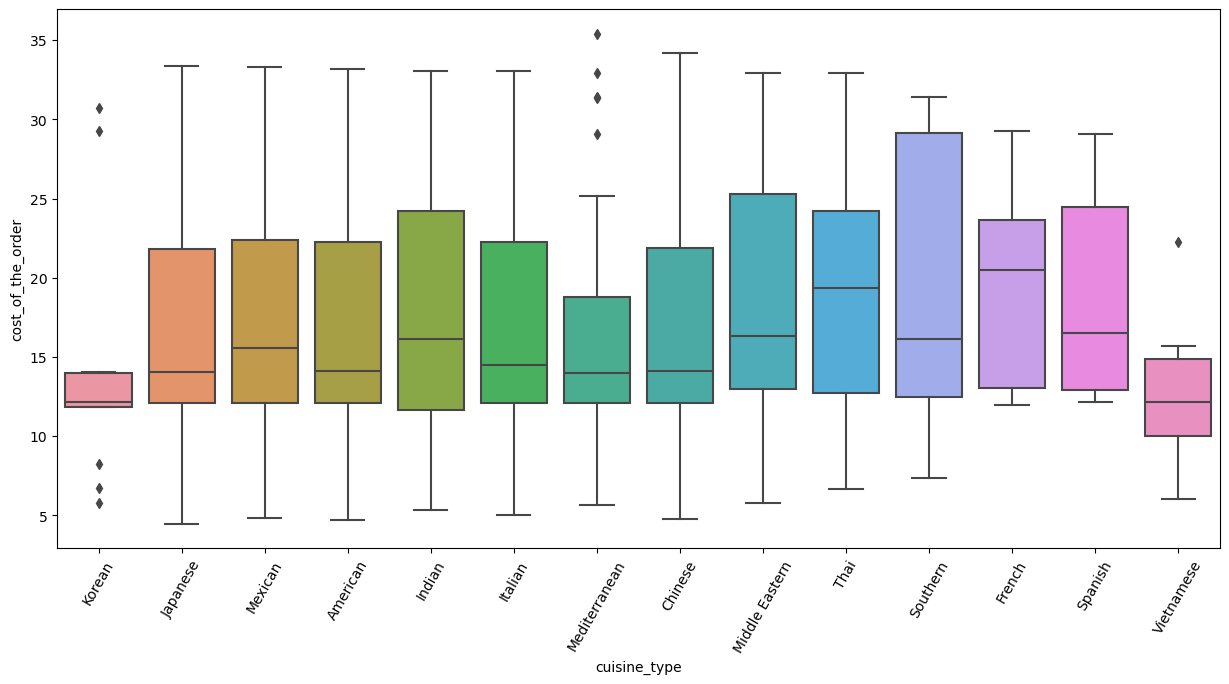

In [236]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, )
plt.xticks(rotation = 60)
plt.show()

Cuisine vs Prep time

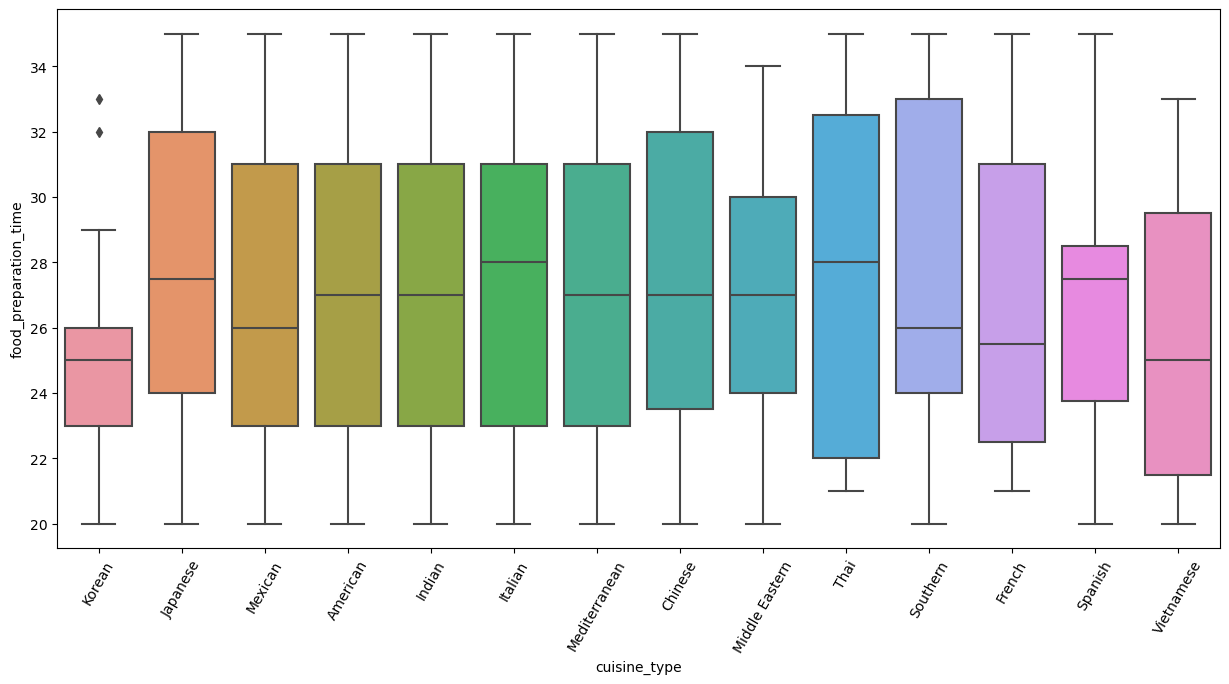

In [244]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, )
plt.xticks(rotation = 60)
plt.show()

Observation
Southern cuisine type takes the most time to prepare
while korean takes the least time

In [238]:
data["restaurant_name"].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [299]:
agg = data.groupby("restaurant_name")["rating"].agg(["count","mean"])

eligible_restaurants = agg[(agg["count"]>50) & (agg["mean"]>4)]

#### Observations:


In [300]:
print("Restaurants eligible for offer:\n", list(eligible_restaurants.index))

Restaurants eligible for offer:
 ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [329]:
def com(x):
    if x > 20:
        return x*.25
    elif x > 5:
        return x*.15
    else:
        x*0
data["revenue"] = data["cost_of_the_order"].apply(com)        

#### Observations:


In [331]:
print("The company's net revenue is", "$", data["revenue"].sum())

The company's net revenue is $ 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [336]:
# Write the code here
data["order_to_delivery_time"] = data["food_preparation_time"]+data["delivery_time"]

In [340]:
percent = data[data["order_to_delivery_time"]>60].shape[0]/data.shape[0]

#### Observations:


In [344]:
print("Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is", round(percent,2),"%")

Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 0.11 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [362]:
# Write the code here
weekday_vary = data[data["day_of_the_week"]=="Weekend"]["delivery_time"].mean()
weekend_vary = data[data["day_of_the_week"]=="Weekday"]["delivery_time"].mean()

#### Observations:


In [365]:
print("Mean delivery time during weekdays", round(weekday_vary,2), "seconds")
print("Mean delivery time during weekends", round(weekend_vary,2), "seconds")

Mean delivery time during weekdays 22.47 seconds
Mean delivery time during weekends 28.34 seconds


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

1. Deliveries take more time on weekends
2. 80% of the time, food gets delivered less that 60 minutes from the time it was ordered 
3. The company's net revenue is $ 6166.303
4. Restaurants eligible for the promotional offer 
 ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']

### Recommendations:

*  

---

1. It must be ensured that more delivery persons are available on weekends
2. Marketing should be enhanced for Vietnamese, Spanish and Korean cuisines because they underperformed compared to others, 
a survey for customers also be conducted to understand customer's preferences
3. Special discount for returning customers should be introduced because the most frequent customer has just 13 orders